In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
#load the data

file_path = '/Users/joeyren/Downloads/Case_Study.xlsx'
df = pd.read_excel(file_path)

In [3]:
orders = 'Orders'  
doctors = 'Doctors' 
orders_df = pd.read_excel(file_path, sheet_name=orders)
doctors_df = pd.read_excel(file_path, sheet_name=doctors)


In [4]:
print(orders_df.shape)
print(doctors_df.shape)

(220576, 3)
(9691, 12)


In [5]:
orders_df.head()

,AccountNumber,Month,Order
0,1086390,2019-11-01,0
1,1086390,2019-12-01,5
2,1079261,2019-11-01,6
3,1079261,2019-08-01,0
4,1079261,2019-12-01,10


In [6]:
doctors_df.head()

,ContactAccountNumber,ContactName,ContactProfessionalCategory,ContactCertificationDate,AdvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable
0,100297,Dr. Thad Burch,Ortho,2000-01-19,Platinum,B,Yes,Litchfield Park,Arizona,AMS-US-SW,AMS-US-SW-SX,AMS-US-SW-SX-OR-Phoenix
1,1005066,Dr. Rita Cordova,GP,2018-09-26,Silver,B,No,San Antonio,Texas,AMS-US-SW,AMS-US-SW-AM,AMS-US-SW-AM-GP-SanAntonW
2,1005902,Dr. Lloyd Schneider,GP,2018-10-16,Silver,C,No,Grand Prairie,Texas,AMS-US-SW,AMS-US-SW-DA,AMS-US-SW-DA-GP-Dallas
3,100641,Dr. Paris Howe,GP,2001-12-07,Silver,C,Yes,Glen Ellyn,Illinois,AMS-US-MW,AMS-US-MW-WC,AMS-US-MW-WC-GP-Elmhurst
4,100688,Dr. Ernestine Harrington,GP,2001-12-07,Silver,C,No,San Jose,California,AMS-US-WE,AMS-US-WE-GG,AMS-US-WE-GG-GP-LosGatos


In [7]:
print(orders_df.dtypes)
print(doctors_df.dtypes)

AccountNumber             int64
Month            datetime64[ns]
Order                     int64
dtype: object
ContactAccountNumber                    int64
ContactName                            object
ContactProfessionalCategory            object
ContactCertificationDate       datetime64[ns]
AdvantageLevel                         object
Segment                                object
iTero_Installed                        object
AccountCity                            object
AccountState                           object
InvSalesAreaLable                      object
InvSalesRegionLable                    object
InvSalesTerritoryLable                 object
dtype: object


In [8]:
print(orders_df.describe())
print(doctors_df.describe())

       AccountNumber          Order
count   2.205760e+05  220576.000000
mean    2.725437e+05       4.159133
std     2.029868e+05      14.209398
min     5.815400e+04      -2.000000
25%     1.316810e+05       0.000000
50%     2.113770e+05       1.000000
75%     3.875370e+05       4.000000
max     1.086390e+06     810.000000
       ContactAccountNumber
count          9.691000e+03
mean           2.812633e+05
std            2.037387e+05
min            5.815400e+04
25%            1.400205e+05
50%            2.176770e+05
75%            3.906120e+05
max            1.086390e+06


In [9]:
orders_df.rename(columns={'Month': 'Date'}, inplace=True)
orders_df.head()

,AccountNumber,Date,Order
0,1086390,2019-11-01,0
1,1086390,2019-12-01,5
2,1079261,2019-11-01,6
3,1079261,2019-08-01,0
4,1079261,2019-12-01,10


In [10]:
orders_df['Year'] = orders_df['Date'].dt.year
orders_df['Month'] = orders_df['Date'].dt.month

orders_df

,AccountNumber,Date,Order,Year,Month
0,1086390,2019-11-01,0,2019,11
1,1086390,2019-12-01,5,2019,12
2,1079261,2019-11-01,6,2019,11
3,1079261,2019-08-01,0,2019,8
4,1079261,2019-12-01,10,2019,12
...,...,...,...,...,...
220571,58154,2018-02-01,8,2018,2
220572,58154,2018-10-01,16,2018,10
220573,58154,2018-08-01,6,2018,8
220574,58154,2019-02-01,11,2019,2


In [11]:

orders_df = orders_df[orders_df['Order'] != 0]
orders_df

,AccountNumber,Date,Order,Year,Month
1,1086390,2019-12-01,5,2019,12
2,1079261,2019-11-01,6,2019,11
4,1079261,2019-12-01,10,2019,12
5,1079261,2019-10-01,6,2019,10
6,1079261,2019-09-01,9,2019,9
...,...,...,...,...,...
220571,58154,2018-02-01,8,2018,2
220572,58154,2018-10-01,16,2018,10
220573,58154,2018-08-01,6,2018,8
220574,58154,2019-02-01,11,2019,2


In [12]:
orders_df.shape

(163863, 5)

In [13]:

doctor_2017 = orders_df.loc[orders_df['Date'].dt.year == 2017, 'AccountNumber'].unique().tolist()
doctor_2018 = orders_df.loc[orders_df['Date'].dt.year == 2018, 'AccountNumber'].unique().tolist()
doctor_2019 = orders_df.loc[orders_df['Date'].dt.year == 2019, 'AccountNumber'].unique()

print(len(doctor_2017))
print(len(doctor_2018))
print(len(doctor_2019))

8358
8385
8498


In [14]:
churned2018 = []

for i in doctor_2017:
    if i not in doctor_2018:
        churned2018.append(i)

                
print(len(churned2018))

492


In [15]:

churned2019 = []
for i in doctor_2018:
    if i not in doctor_2019:
        churned2019.append(i)
    
print(len(churned2019))

399


In [16]:
orders_df.head()

,AccountNumber,Date,Order,Year,Month
1,1086390,2019-12-01,5,2019,12
2,1079261,2019-11-01,6,2019,11
4,1079261,2019-12-01,10,2019,12
5,1079261,2019-10-01,6,2019,10
6,1079261,2019-09-01,9,2019,9


In [17]:
grouped = orders_df.groupby(['Year'])
average_month_number = grouped['Month'].mean()
average_month_number


Year
2017    6.560027
2018    6.476784
2019    6.485612
Name: Month, dtype: float64

In [18]:
grouped_by_doctor = orders_df.groupby(['Year','AccountNumber'])
average_month_number_by_doctor = grouped_by_doctor['Month'].mean()
average_month_number_by_doctor.head()


Year  AccountNumber
2017  58154            6.500000
      58156            5.800000
      58157            6.363636
      58163            7.625000
      58168            6.500000
Name: Month, dtype: float64

In [19]:
# Create three empty lists for each year
year2017 = []
year2018 = []
year2019 = []

# Iterate over the selected ids and append them to the corresponding year's list
for year, doctor in average_month_number_by_doctor[average_month_number_by_doctor < 3].reset_index().groupby('Year')['AccountNumber']:
    if year == 2017:
        year2017.extend(list(set(doctor)))
    elif year == 2018:
        year2018.extend(list(set(doctor)))
    elif year == 2019:
        year2019.extend(list(set(doctor)))

# Display the selected ids for each year
print("Year 2017:", len(year2017))
print("Year 2018:", len(year2018))
print("Year 2019:",len(year2019))


Year 2017: 219
Year 2018: 238
Year 2019: 196


In [20]:
overlap2018=[]
for i in churned2018:
    if i in year2017:
        overlap2018.append(i)
print(len(overlap2018))

overlap2019=[]
for i in churned2019:
    if i in year2018:
        overlap2019.append(i)
print(len(overlap2019))

72
72


<Axes: >

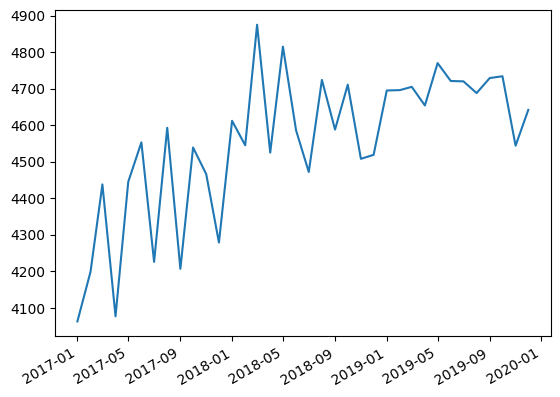

In [21]:
orders_df['Date'].value_counts()\
    .head(100)\
    .plot(kind = 'line')

In [22]:
doctors_df.head()

,ContactAccountNumber,ContactName,ContactProfessionalCategory,ContactCertificationDate,AdvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable
0,100297,Dr. Thad Burch,Ortho,2000-01-19,Platinum,B,Yes,Litchfield Park,Arizona,AMS-US-SW,AMS-US-SW-SX,AMS-US-SW-SX-OR-Phoenix
1,1005066,Dr. Rita Cordova,GP,2018-09-26,Silver,B,No,San Antonio,Texas,AMS-US-SW,AMS-US-SW-AM,AMS-US-SW-AM-GP-SanAntonW
2,1005902,Dr. Lloyd Schneider,GP,2018-10-16,Silver,C,No,Grand Prairie,Texas,AMS-US-SW,AMS-US-SW-DA,AMS-US-SW-DA-GP-Dallas
3,100641,Dr. Paris Howe,GP,2001-12-07,Silver,C,Yes,Glen Ellyn,Illinois,AMS-US-MW,AMS-US-MW-WC,AMS-US-MW-WC-GP-Elmhurst
4,100688,Dr. Ernestine Harrington,GP,2001-12-07,Silver,C,No,San Jose,California,AMS-US-WE,AMS-US-WE-GG,AMS-US-WE-GG-GP-LosGatos


<Axes: >

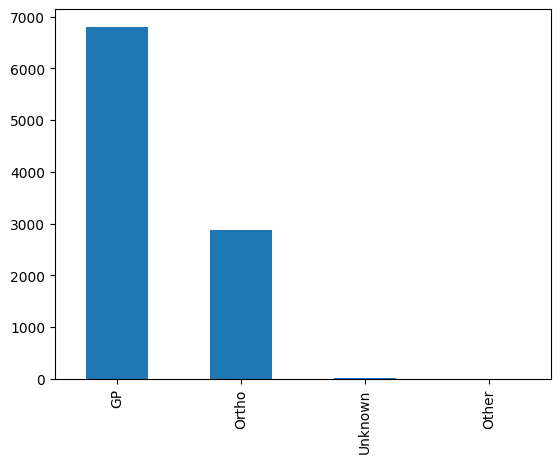

In [23]:
doctors_df['ContactProfessionalCategory'].value_counts()\
    .tail(10)\
    .plot(kind = 'bar')

<Axes: >

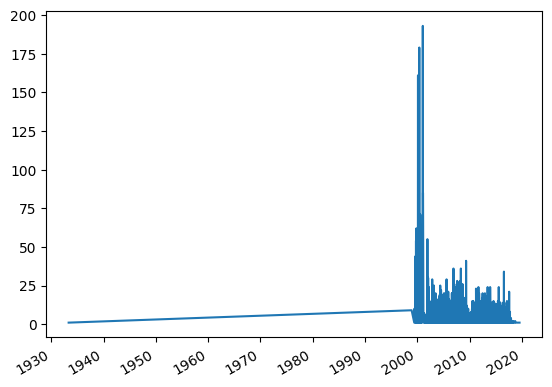

In [24]:
doctors_df['ContactCertificationDate'].value_counts()\
    .plot(kind = 'line')

<Axes: >

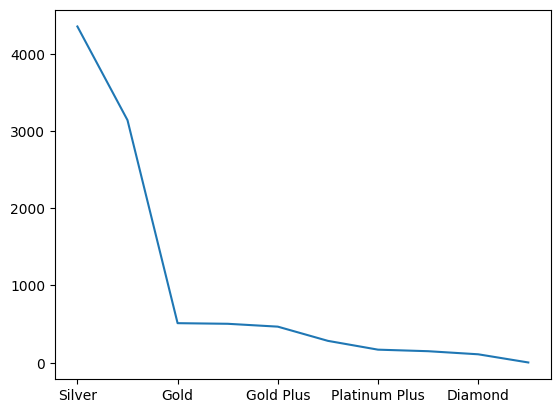

In [25]:
doctors_df['AdvantageLevel'].value_counts()\
    .plot(kind = 'line')



In [26]:
doctors_df.head()

,ContactAccountNumber,ContactName,ContactProfessionalCategory,ContactCertificationDate,AdvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable
0,100297,Dr. Thad Burch,Ortho,2000-01-19,Platinum,B,Yes,Litchfield Park,Arizona,AMS-US-SW,AMS-US-SW-SX,AMS-US-SW-SX-OR-Phoenix
1,1005066,Dr. Rita Cordova,GP,2018-09-26,Silver,B,No,San Antonio,Texas,AMS-US-SW,AMS-US-SW-AM,AMS-US-SW-AM-GP-SanAntonW
2,1005902,Dr. Lloyd Schneider,GP,2018-10-16,Silver,C,No,Grand Prairie,Texas,AMS-US-SW,AMS-US-SW-DA,AMS-US-SW-DA-GP-Dallas
3,100641,Dr. Paris Howe,GP,2001-12-07,Silver,C,Yes,Glen Ellyn,Illinois,AMS-US-MW,AMS-US-MW-WC,AMS-US-MW-WC-GP-Elmhurst
4,100688,Dr. Ernestine Harrington,GP,2001-12-07,Silver,C,No,San Jose,California,AMS-US-WE,AMS-US-WE-GG,AMS-US-WE-GG-GP-LosGatos


<Axes: xlabel='AdvantageLevel', ylabel='InvSalesAreaLable'>

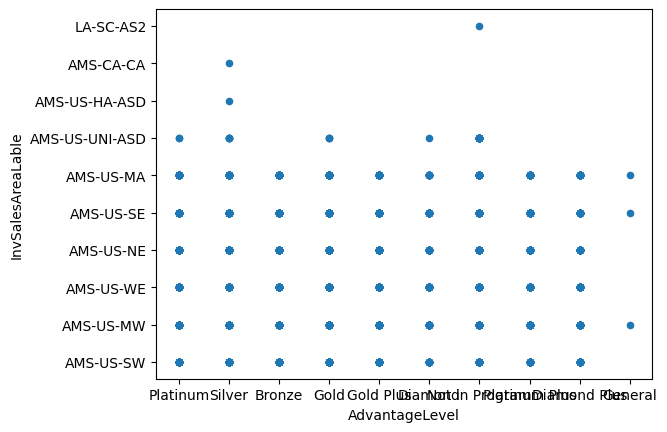

In [27]:
doctors_df.plot(kind = 'scatter',
               x='AdvantageLevel',
               y='InvSalesAreaLable')

In [28]:
grouped_df = orders_df.groupby(['AccountNumber', 'Year'])['Order'].sum().reset_index()
grouped_df

,AccountNumber,Year,Order
0,58154,2017,111
1,58154,2018,103
2,58154,2019,151
3,58156,2017,22
4,58156,2018,8
...,...,...,...
25236,1036198,2019,138
25237,1036235,2019,127
25238,1077811,2019,18
25239,1079261,2019,31


In [29]:
pivot_df = grouped_df.pivot(index='AccountNumber', columns='Year', values='Order')
pivot_df.columns = ['2017', '2018', '2019']
pivot_df = pivot_df.reset_index()
print(pivot_df)

      AccountNumber   2017   2018   2019
0             58154  111.0  103.0  151.0
1             58156   22.0    8.0   12.0
2             58157   29.0   35.0   37.0
3             58163    8.0    6.0    9.0
4             58168   45.0   27.0  164.0
...             ...    ...    ...    ...
9100        1036198    NaN    NaN  138.0
9101        1036235    NaN    NaN  127.0
9102        1077811    NaN    NaN   18.0
9103        1079261    NaN    NaN   31.0
9104        1086390    NaN    NaN    5.0

[9105 rows x 4 columns]


In [30]:
pivot_df = pivot_df.fillna(0)
pivot_df

,AccountNumber,2017,2018,2019
0,58154,111.0,103.0,151.0
1,58156,22.0,8.0,12.0
2,58157,29.0,35.0,37.0
3,58163,8.0,6.0,9.0
4,58168,45.0,27.0,164.0
...,...,...,...,...
9100,1036198,0.0,0.0,138.0
9101,1036235,0.0,0.0,127.0
9102,1077811,0.0,0.0,18.0
9103,1079261,0.0,0.0,31.0


In [31]:
merged_df = pd.merge(doctors_df, pivot_df,left_on='ContactAccountNumber', right_on='AccountNumber')

In [32]:
merged_df.dtypes

ContactAccountNumber                    int64
ContactName                            object
ContactProfessionalCategory            object
ContactCertificationDate       datetime64[ns]
AdvantageLevel                         object
Segment                                object
iTero_Installed                        object
AccountCity                            object
AccountState                           object
InvSalesAreaLable                      object
InvSalesRegionLable                    object
InvSalesTerritoryLable                 object
AccountNumber                           int64
2017                                  float64
2018                                  float64
2019                                  float64
dtype: object

In [33]:
merged_df.head()

,ContactAccountNumber,ContactName,ContactProfessionalCategory,ContactCertificationDate,AdvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable,AccountNumber,2017,2018,2019
0,100297,Dr. Thad Burch,Ortho,2000-01-19,Platinum,B,Yes,Litchfield Park,Arizona,AMS-US-SW,AMS-US-SW-SX,AMS-US-SW-SX-OR-Phoenix,100297,92.0,112.0,62.0
1,1005066,Dr. Rita Cordova,GP,2018-09-26,Silver,B,No,San Antonio,Texas,AMS-US-SW,AMS-US-SW-AM,AMS-US-SW-AM-GP-SanAntonW,1005066,0.0,1.0,7.0
2,1005902,Dr. Lloyd Schneider,GP,2018-10-16,Silver,C,No,Grand Prairie,Texas,AMS-US-SW,AMS-US-SW-DA,AMS-US-SW-DA-GP-Dallas,1005902,0.0,0.0,15.0
3,100641,Dr. Paris Howe,GP,2001-12-07,Silver,C,Yes,Glen Ellyn,Illinois,AMS-US-MW,AMS-US-MW-WC,AMS-US-MW-WC-GP-Elmhurst,100641,12.0,30.0,23.0
4,100688,Dr. Ernestine Harrington,GP,2001-12-07,Silver,C,No,San Jose,California,AMS-US-WE,AMS-US-WE-GG,AMS-US-WE-GG-GP-LosGatos,100688,20.0,20.0,30.0


In [34]:
orders_df.head()

,AccountNumber,Date,Order,Year,Month
1,1086390,2019-12-01,5,2019,12
2,1079261,2019-11-01,6,2019,11
4,1079261,2019-12-01,10,2019,12
5,1079261,2019-10-01,6,2019,10
6,1079261,2019-09-01,9,2019,9


In [35]:

# Group by 'AccountNumber' and calculate the sum of 'Order' column
grouped_df2 = orders_df.groupby('AccountNumber')['Order'].sum().reset_index()

# Merge with 'merged_df' on 'ContactAccountNumber'
merged_df = pd.merge(merged_df, grouped_df2, left_on='ContactAccountNumber', right_on='AccountNumber', suffixes=('', '_sum'))



In [36]:
merged_df.head()

,ContactAccountNumber,ContactName,ContactProfessionalCategory,ContactCertificationDate,AdvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable,AccountNumber,2017,2018,2019,AccountNumber_sum,Order
0,100297,Dr. Thad Burch,Ortho,2000-01-19,Platinum,B,Yes,Litchfield Park,Arizona,AMS-US-SW,AMS-US-SW-SX,AMS-US-SW-SX-OR-Phoenix,100297,92.0,112.0,62.0,100297,266
1,1005066,Dr. Rita Cordova,GP,2018-09-26,Silver,B,No,San Antonio,Texas,AMS-US-SW,AMS-US-SW-AM,AMS-US-SW-AM-GP-SanAntonW,1005066,0.0,1.0,7.0,1005066,8
2,1005902,Dr. Lloyd Schneider,GP,2018-10-16,Silver,C,No,Grand Prairie,Texas,AMS-US-SW,AMS-US-SW-DA,AMS-US-SW-DA-GP-Dallas,1005902,0.0,0.0,15.0,1005902,15
3,100641,Dr. Paris Howe,GP,2001-12-07,Silver,C,Yes,Glen Ellyn,Illinois,AMS-US-MW,AMS-US-MW-WC,AMS-US-MW-WC-GP-Elmhurst,100641,12.0,30.0,23.0,100641,65
4,100688,Dr. Ernestine Harrington,GP,2001-12-07,Silver,C,No,San Jose,California,AMS-US-WE,AMS-US-WE-GG,AMS-US-WE-GG-GP-LosGatos,100688,20.0,20.0,30.0,100688,70


In [37]:
# Drop two columns from the DataFrame
merged_df = merged_df.drop(['AccountNumber', 'AccountNumber_sum'], axis=1)


In [38]:
merged_df.head()

,ContactAccountNumber,ContactName,ContactProfessionalCategory,ContactCertificationDate,AdvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable,2017,2018,2019,Order
0,100297,Dr. Thad Burch,Ortho,2000-01-19,Platinum,B,Yes,Litchfield Park,Arizona,AMS-US-SW,AMS-US-SW-SX,AMS-US-SW-SX-OR-Phoenix,92.0,112.0,62.0,266
1,1005066,Dr. Rita Cordova,GP,2018-09-26,Silver,B,No,San Antonio,Texas,AMS-US-SW,AMS-US-SW-AM,AMS-US-SW-AM-GP-SanAntonW,0.0,1.0,7.0,8
2,1005902,Dr. Lloyd Schneider,GP,2018-10-16,Silver,C,No,Grand Prairie,Texas,AMS-US-SW,AMS-US-SW-DA,AMS-US-SW-DA-GP-Dallas,0.0,0.0,15.0,15
3,100641,Dr. Paris Howe,GP,2001-12-07,Silver,C,Yes,Glen Ellyn,Illinois,AMS-US-MW,AMS-US-MW-WC,AMS-US-MW-WC-GP-Elmhurst,12.0,30.0,23.0,65
4,100688,Dr. Ernestine Harrington,GP,2001-12-07,Silver,C,No,San Jose,California,AMS-US-WE,AMS-US-WE-GG,AMS-US-WE-GG-GP-LosGatos,20.0,20.0,30.0,70


In [39]:
merged_df['Tenure'] = (pd.to_datetime('2019') - merged_df['ContactCertificationDate']).dt.days

# Convert tenure to years (optional)
merged_df['Tenure'] = merged_df['Tenure'] / 365.25  # Considering leap years

In [40]:
merged_df.dropna(inplace=True)

In [41]:
merged_df.isna().sum()

ContactAccountNumber           0
ContactName                    0
ContactProfessionalCategory    0
ContactCertificationDate       0
AdvantageLevel                 0
Segment                        0
iTero_Installed                0
AccountCity                    0
AccountState                   0
InvSalesAreaLable              0
InvSalesRegionLable            0
InvSalesTerritoryLable         0
2017                           0
2018                           0
2019                           0
Order                          0
Tenure                         0
dtype: int64

In [42]:
merged_df.describe()

,ContactAccountNumber,2017,2018,2019,Order,Tenure
count,8.990000e+03,8990.000000,8990.000000,8990.000000,8990.000000,8990.000000
mean,2.819630e+05,29.462069,33.812681,36.598331,99.873081,10.889871
std,2.043827e+05,130.285223,132.664634,135.778948,384.912117,5.241416
min,5.815400e+04,-2.000000,0.000000,-2.000000,-2.000000,-0.555784
25%,1.409702e+05,3.000000,4.000000,4.000000,12.000000,6.354552
50%,2.183090e+05,8.000000,9.000000,9.000000,28.000000,11.281314
75%,3.901010e+05,20.000000,24.000000,25.000000,69.000000,15.112936
max,1.086390e+06,6300.000000,5100.000000,6650.000000,18050.000000,85.689254


In [43]:
top_10_max_values = merged_df.nlargest(10, 'Order')
top_10_max_values

,ContactAccountNumber,ContactName,ContactProfessionalCategory,ContactCertificationDate,AdvantageLevel,Segment,iTero_Installed,AccountCity,AccountState,InvSalesAreaLable,InvSalesRegionLable,InvSalesTerritoryLable,2017,2018,2019,Order,Tenure
7880,64481,Dr. Kailee Byrd,Ortho,1999-09-01,Diamond Plus,C,Yes,West Lake Hills,Texas,AMS-US-SW,AMS-US-SW-SX,AMS-US-SW-SX-OR-Austin,6300.0,5100.0,6650.0,18050,19.334702
7405,61039,Dr. Charity Williams,Ortho,2000-05-19,Diamond Plus,C,Yes,Rochester Hills,Michigan,AMS-US-MW,AMS-US-MW-HE,AMS-US-MW-HE-OR-Detroit,4899.0,4646.0,3910.0,13455,18.620123
3269,212707,Dr. Nathaly Case,Ortho,2007-07-24,Diamond Plus,A,Yes,Wake Forest,North Carolina,AMS-US-SE,AMS-US-SE-NX,AMS-US-SE-NX-OR-Raleigh,3180.0,3688.0,3356.0,10224,11.441478
7916,74514,Dr. Makayla Patel,Ortho,1998-12-01,Diamond Plus,C,Yes,Overland Park,Kansas,AMS-US-MW,AMS-US-MW-NP,AMS-US-MW-NP-OR-NPWest,2275.0,3210.0,3095.0,8580,20.084873
2655,191240,Dr. Shyann Benjamin,Ortho,2004-04-12,Diamond Plus,A,Yes,Puyallup,Washington,AMS-US-WE,AMS-US-WE-PN,AMS-US-WE-PN-OR-Bellevue,1719.0,4212.0,657.0,6588,14.721424
4620,271156,Dr. Isabela Anderson,GP,2007-09-21,Diamond Plus,A,Yes,Carrollton,Texas,AMS-US-SW,AMS-US-SW-DA,AMS-US-SW-DA-GP-Frisco,4664.0,1537.0,371.0,6572,11.279945
7861,59592,Dr. Reilly Callahan,Ortho,2000-05-19,Diamond Plus,B,Yes,Eau Claire,Wisconsin,AMS-US-MW,AMS-US-MW-NP,AMS-US-MW-NP-OR-MinneapS,1575.0,2480.0,2490.0,6545,18.620123
9029,91524,Dr. Rose Oconnor,Ortho,2004-01-01,Diamond Plus,B,Yes,Hackensack,New Jersey,AMS-US-NE,AMS-US-NE-NY,AMS-US-NE-NY-OR-Bloom,876.0,1410.0,2202.0,4488,15.000684
302,111518,Dr. Howard Stevens,Ortho,2002-05-17,Diamond Plus,B,Yes,Newtown,Connecticut,AMS-US-NE,AMS-US-NE-NZ,AMS-US-NE-NZ-OR-Hartford,1365.0,1232.0,1750.0,4347,16.626968
2418,184321,Dr. Ramon Meza,Ortho,2004-12-14,Diamond Plus,A,Yes,Ashburn,Virginia,AMS-US-MA,AMS-US-MA-CP,AMS-US-MA-CP-OR-DC,1246.0,1498.0,1502.0,4246,14.047912


In [44]:
merged_df.columns

Index(['ContactAccountNumber', 'ContactName', 'ContactProfessionalCategory',
       'ContactCertificationDate', 'AdvantageLevel', 'Segment',
       'iTero_Installed', 'AccountCity', 'AccountState', 'InvSalesAreaLable',
       'InvSalesRegionLable', 'InvSalesTerritoryLable', '2017', '2018', '2019',
       'Order', 'Tenure'],
      dtype='object')

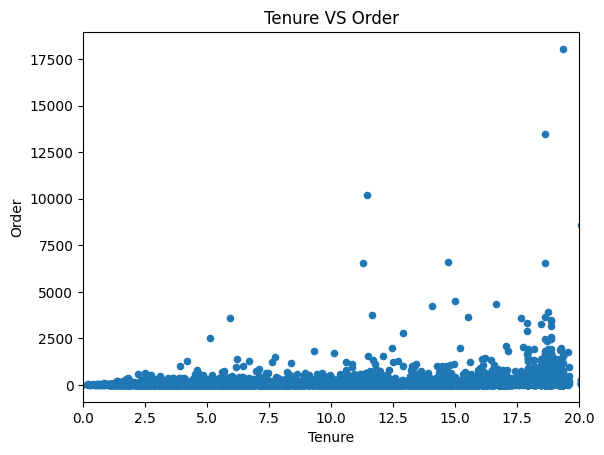

In [45]:
ax = merged_df.plot(kind='scatter', x='Tenure', y='Order')
ax.set_xlim(0, 20) 
ax.set_title("Tenure VS Order")
plt.show()

In [46]:
merged_df.columns

Index(['ContactAccountNumber', 'ContactName', 'ContactProfessionalCategory',
       'ContactCertificationDate', 'AdvantageLevel', 'Segment',
       'iTero_Installed', 'AccountCity', 'AccountState', 'InvSalesAreaLable',
       'InvSalesRegionLable', 'InvSalesTerritoryLable', '2017', '2018', '2019',
       'Order', 'Tenure'],
      dtype='object')

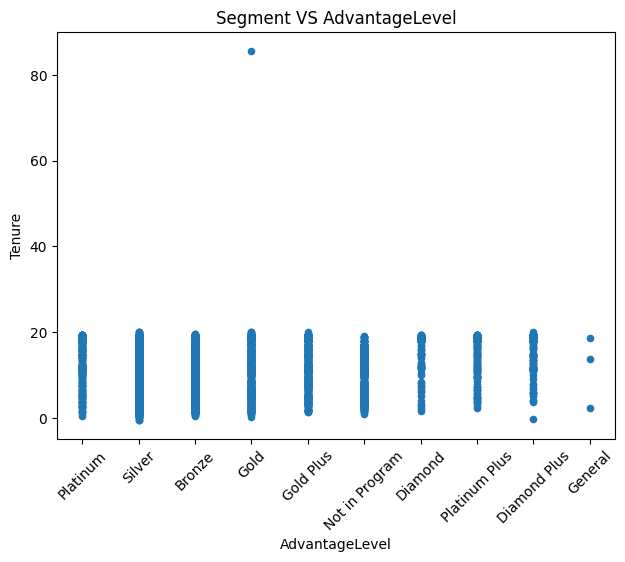

In [47]:
ax = merged_df.plot(kind='scatter', x='AdvantageLevel', y='Tenure')
plt.tight_layout()
plt.xticks(rotation=45)
ax.set_title("Segment VS AdvantageLevel")
plt.show()

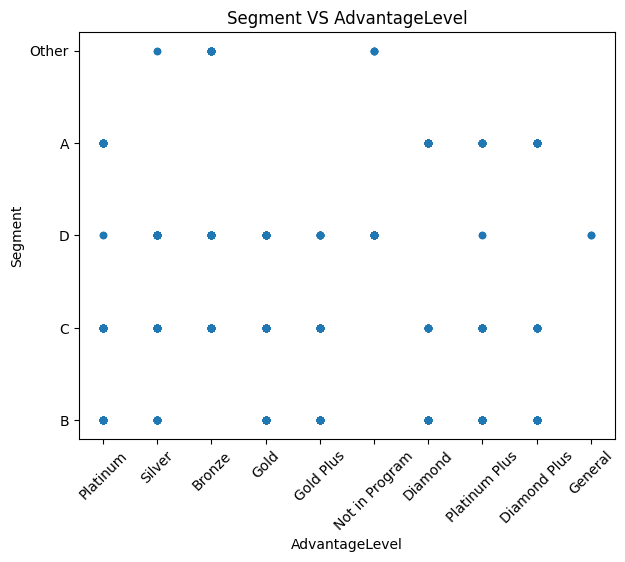

In [48]:
ax = merged_df.plot(kind='scatter', x='AdvantageLevel', y='Segment')
plt.tight_layout()
plt.xticks(rotation=45)
ax.set_title("Segment VS AdvantageLevel")
plt.show()

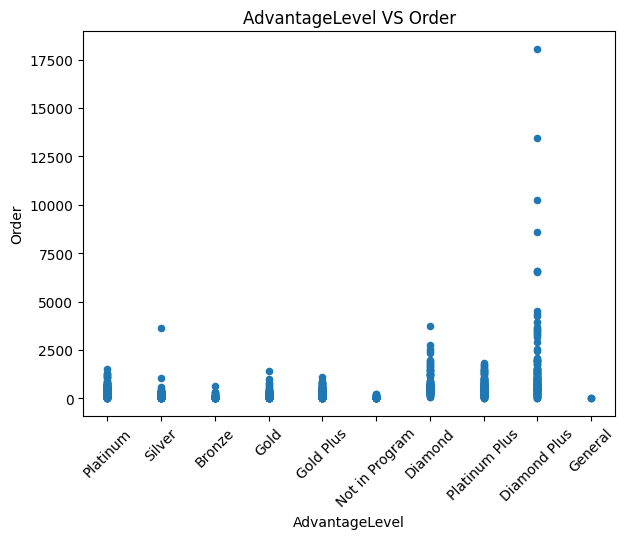

In [49]:
ax = merged_df.plot(kind='scatter', x='AdvantageLevel', y='Order')

ax.set_title("AdvantageLevel VS Order")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

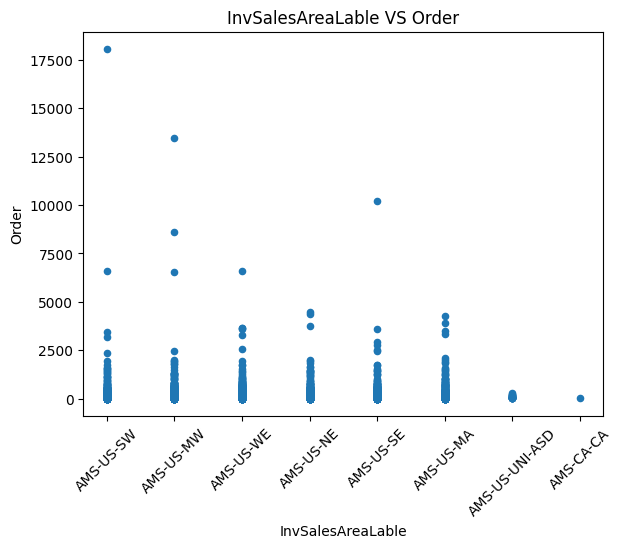

In [50]:
ax = merged_df.plot(kind='scatter', x='InvSalesAreaLable', y='Order')

ax.set_title("InvSalesAreaLable VS Order")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [51]:
# orders_df.to_excel('orders.xlsx', index=False)